In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("서울시 공동주택 아파트 정보.csv", encoding = 'cp949')

In [4]:
df = df[["주소(시군구)","주소(읍면동)", "k-사용검사일-사용승인일","k-연면적","좌표X","좌표Y"]]

In [5]:
df

,주소(시군구),주소(읍면동),k-사용검사일-사용승인일,k-연면적,좌표X,좌표Y
0,동작구,흑석동,2003-12-26 00:00:00.0,27097.0,126.959639,37.500668
1,송파구,장지동,2011-01-27 00:00:00.0,30646.0,127.129179,37.476897
2,송파구,오금동,1997-01-24 00:00:00.0,7318.0,127.128775,37.508906
3,구로구,개봉동,1994-05-09 00:00:00.0,24523.0,126.840675,37.501162
4,노원구,월계동,2005-03-31 00:00:00.0,24680.0,127.058220,37.631732
...,...,...,...,...,...,...
2619,강동구,상일동,2022-04-15 00:00:00.0,75185.0,NaN,NaN
2620,강북구,미아동,2022-04-28 00:00:00.0,30978.0,127.033011,37.620171
2621,강남구,역삼동,2022-04-28 00:00:00.0,102103.0,127.045793,37.500586
2622,영등포구,신길동,2022-07-28 00:00:00.0,124666.0,126.916553,37.507791


In [4]:
df["k-사용검사일-사용승인일"] = df["k-사용검사일-사용승인일"].str[:4]
df["k-사용검사일-사용승인일"]=df["k-사용검사일-사용승인일"].fillna(1999)
df=df.astype({'k-사용검사일-사용승인일':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   주소(시군구)        2624 non-null   object 
 1   주소(읍면동)        2624 non-null   object 
 2   k-사용검사일-사용승인일  2624 non-null   int64  
 3   좌표X            2613 non-null   float64
 4   좌표Y            2613 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 102.6+ KB


In [5]:
df.columns=['gu','dong','year','x','y']

In [6]:
df.drop(df.loc[df['x']<=110.0].index,inplace=True)

In [35]:
##건축년도 비율
df.value_counts('year').head(20)/df.shape[0]

year
1999    0.066336
2004    0.052993
2000    0.051849
2003    0.049943
1998    0.038887
1997    0.038506
2005    0.037743
2001    0.036218
2002    0.030881
2006    0.030118
1996    0.029737
2008    0.028212
1992    0.026306
1993    0.025925
1988    0.025543
2011    0.025162
1995    0.025162
2007    0.024400
2010    0.023637
2009    0.023256
dtype: float64

<AxesSubplot:ylabel='Frequency'>

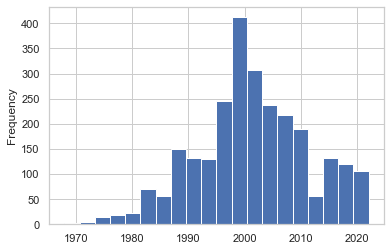

In [7]:
sns.set(style='whitegrid')
df['year'].plot.hist(bins=20)

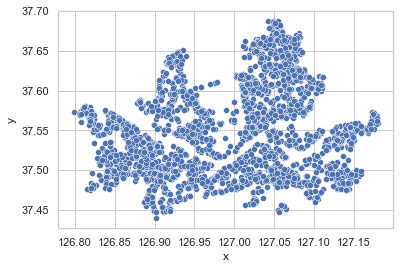

In [8]:
sns.scatterplot(x="x", y="y", data=df, palette="Set2");

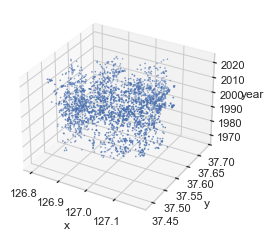

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x=df['x']
y=df['y']
z=df['year']
ax.scatter(x,y,z,marker='o',s=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('year')
plt.show()

In [10]:
c_n=df['gu']=="노원구"
c_s1=df['gu']=="서초구"
c_g=df['gu']=="강북구"
c_s2=df['gu']=="송파구"
df_No=df[c_n]
df_Seo=df[c_s1]
df_Gang=df[c_g]
df_Song=df[c_s2]

In [25]:
df_No.value_counts('year').head(10)/df_No.shape[0]

year
1999    0.115942
1988    0.101449
2000    0.082126
1995    0.067633
1993    0.062802
1998    0.057971
1997    0.053140
1989    0.048309
2002    0.038647
2005    0.033816
dtype: float64

<AxesSubplot:ylabel='Frequency'>

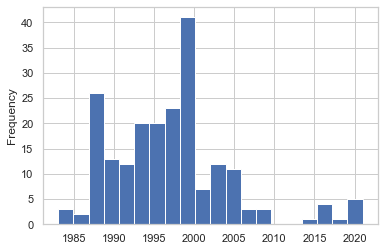

In [11]:
df_No['year'].plot.hist(bins=20)

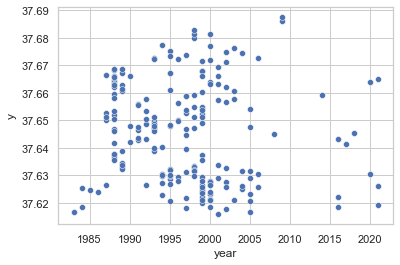

In [12]:
sns.scatterplot(x="year", y="y", data=df_No, palette="Set2");

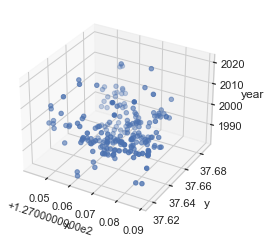

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x=df_No['x']
y=df_No['y']
z=df_No['year']
ax.scatter(x,y,z,marker='o',s=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('year')
plt.show()

<AxesSubplot:ylabel='Frequency'>

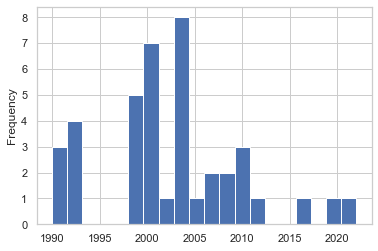

In [14]:
df_Gang['year'].plot.hist(bins=20)

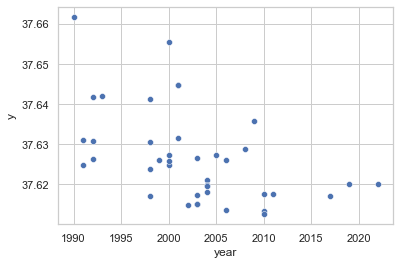

In [21]:
sns.scatterplot(x="year", y="y", data=df_Gang, palette="Set2");

<AxesSubplot:ylabel='Frequency'>

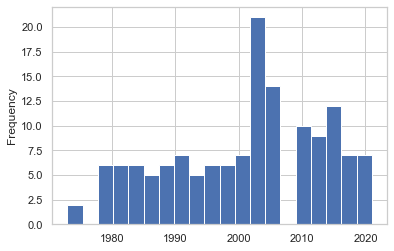

In [15]:
df_Seo['year'].plot.hist(bins=20)

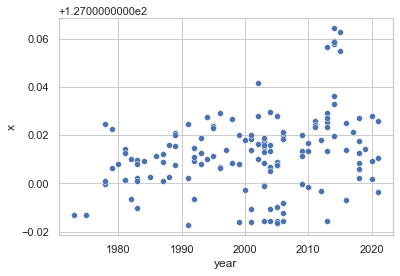

In [38]:
sns.scatterplot(x="year", y="x", data=df_Seo, palette="Set2");

<AxesSubplot:ylabel='Frequency'>

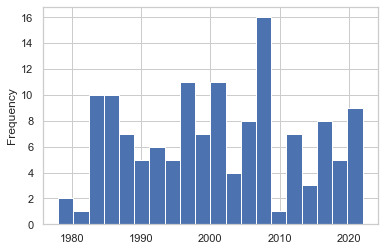

In [16]:
df_Song['year'].plot.hist(bins=20)

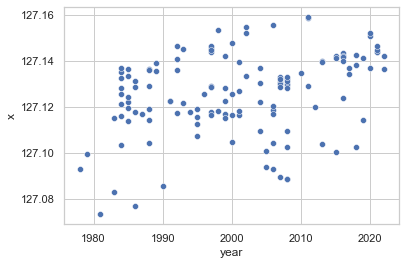

In [37]:
sns.scatterplot(x="year", y="x", data=df_Song, palette="Set2");

In [17]:
##노원+강북, 서초+송파
df_NG=df[c_n|c_g]
df_SS=df[c_s1|c_s2]

<AxesSubplot:ylabel='Frequency'>

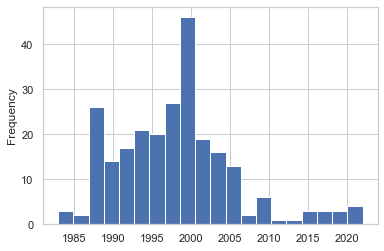

In [18]:
df_NG['year'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

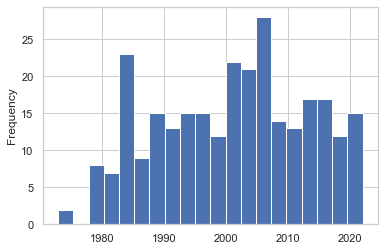

In [19]:
df_SS['year'].plot.hist(bins=20)